## 1. Import Necessary libraries

In [31]:
import pandas as pd
from matplotlib import pyplot as plt

## 2. Import Dataset

In [4]:
shampoo_sales = pd.read_csv('sales.csv')
shampoo_sales

,Month,Sales,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1/1/1990,266.0,NaN,NaN,NaN,NaN
1,2/1/1990,145.9,NaN,NaN,NaN,NaN
2,3/1/1990,183.1,NaN,NaN,NaN,NaN
3,4/1/1990,119.3,NaN,NaN,NaN,NaN
4,5/1/1990,180.3,NaN,NaN,NaN,NaN
5,6/1/1990,168.5,NaN,NaN,NaN,NaN
6,7/1/1990,231.8,NaN,NaN,NaN,NaN
7,8/1/1990,224.5,NaN,NaN,NaN,NaN
8,9/1/1990,192.8,NaN,NaN,NaN,NaN
9,10/1/1990,122.9,NaN,NaN,NaN,NaN


## 3. Data Understanding

In [5]:
shampoo_sales.shape

(36, 6)

In [6]:
shampoo_sales.isna().sum()

Month          0
Sales          0
Unnamed: 2    36
Unnamed: 3    36
Unnamed: 4    36
Unnamed: 5    36
dtype: int64

## 4. Data Preparation

In [8]:
shampoo_sales.drop(labels=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5'],axis=1,inplace=True)

In [9]:
shampoo_sales.dtypes

Month     object
Sales    float64
dtype: object

In [10]:
shampoo_sales.to_csv('shampoo_sales.csv')

### Import data

In [26]:
shampoo_sales_2 = pd.read_csv('sales.csv',index_col='Month',parse_dates=True,squeeze = True)
shampoo_sales_2

Month
1990-01-01    266.0
1990-02-01    145.9
1990-03-01    183.1
1990-04-01    119.3
1990-05-01    180.3
1990-06-01    168.5
1990-07-01    231.8
1990-08-01    224.5
1990-09-01    192.8
1990-10-01    122.9
1990-11-01    336.5
1990-12-01    185.9
1991-01-01    194.3
1991-02-01    149.5
1991-03-01    210.1
1991-04-01    273.3
1991-05-01    191.4
1991-06-01    287.0
1991-07-01    226.0
1991-08-01    303.6
1991-09-01    289.9
1991-10-01    421.6
1991-11-01    264.5
1991-12-01    342.3
1992-01-01    339.7
1992-02-01    440.4
1992-03-01    315.9
1992-04-01    439.3
1992-05-01    401.3
1992-06-01    437.4
1992-07-01    575.5
1992-08-01    407.6
1992-09-01    682.0
1992-10-01    475.3
1992-11-01    581.3
1992-12-01    646.9
Name: Sales, dtype: float64

### Get daily sales information

In [28]:
upsampled_data = shampoo_sales_2.resample('D').mean()
upsampled_data

Month
1990-01-01    266.0
1990-01-02      NaN
1990-01-03      NaN
1990-01-04      NaN
1990-01-05      NaN
              ...  
1992-11-27      NaN
1992-11-28      NaN
1992-11-29      NaN
1992-11-30      NaN
1992-12-01    646.9
Freq: D, Name: Sales, Length: 1066, dtype: float64

In [30]:
interpolated_data = upsampled_data.interpolate(method = 'linear')
interpolated_data

Month
1990-01-01    266.000000
1990-01-02    262.125806
1990-01-03    258.251613
1990-01-04    254.377419
1990-01-05    250.503226
                 ...    
1992-11-27    638.153333
1992-11-28    640.340000
1992-11-29    642.526667
1992-11-30    644.713333
1992-12-01    646.900000
Freq: D, Name: Sales, Length: 1066, dtype: float64

### Before Linear Interpolation

In [33]:
shampoo_sales_3 = pd.read_csv('sales.csv',index_col='Month',parse_dates=True)
shampoo_sales_3

,Sales
Month,
1990-01-01,266.0
1990-02-01,145.9
1990-03-01,183.1
1990-04-01,119.3
1990-05-01,180.3
1990-06-01,168.5
1990-07-01,231.8
1990-08-01,224.5
1990-09-01,192.8


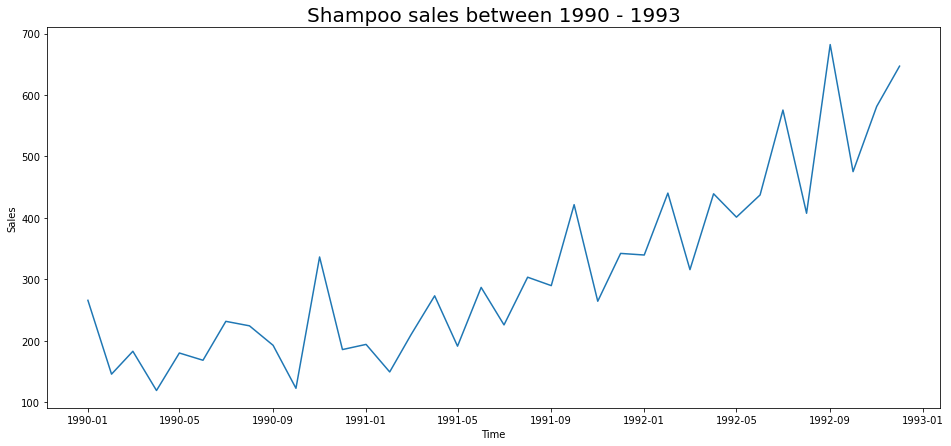

In [37]:
plt.figure(figsize = (16,7))
plt.plot(shampoo_sales_3)
plt.title('Shampoo sales between 1990 - 1993',size = 20)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

### After Linear Interpolation

In [38]:
interpolated_data = upsampled_data.interpolate(method = 'linear')
interpolated_data

Month
1990-01-01    266.000000
1990-01-02    262.125806
1990-01-03    258.251613
1990-01-04    254.377419
1990-01-05    250.503226
                 ...    
1992-11-27    638.153333
1992-11-28    640.340000
1992-11-29    642.526667
1992-11-30    644.713333
1992-12-01    646.900000
Freq: D, Name: Sales, Length: 1066, dtype: float64

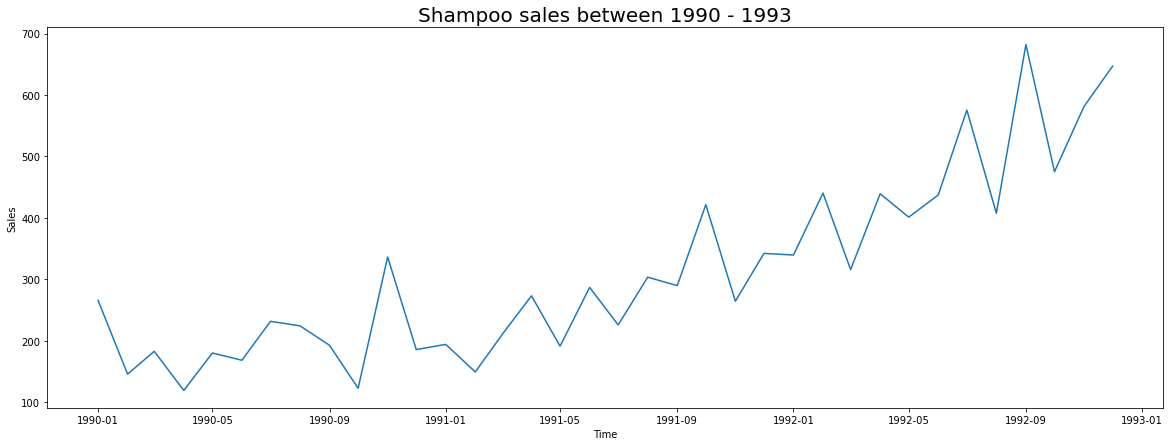

In [43]:
plt.figure(figsize = (20,7))
plt.plot(interpolated_data)
plt.title('Shampoo sales between 1990 - 1993',size = 20)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

### Downsampling

In [49]:
quarterly_sales = shampoo_sales_2.resample('Q').mean()
quarterly_sales

Month
1990-03-31    198.333333
1990-06-30    156.033333
1990-09-30    216.366667
1990-12-31    215.100000
1991-03-31    184.633333
1991-06-30    250.566667
1991-09-30    273.166667
1991-12-31    342.800000
1992-03-31    365.333333
1992-06-30    426.000000
1992-09-30    555.033333
1992-12-31    567.833333
Freq: Q-DEC, Name: Sales, dtype: float64

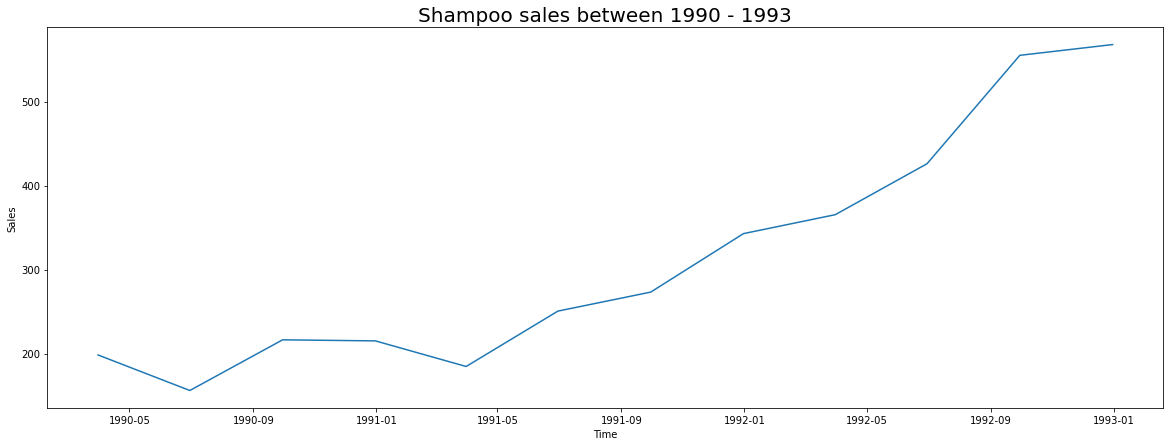

In [47]:
plt.figure(figsize = (20,7))
plt.plot(quarterly_sales)
plt.title('Shampoo sales between 1990 - 1993',size = 20)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

## THE END!!